### Random Forest -Preprocessing de la primera parte

La idea de este notebook es entrenar un random forest con las variables utilizadas en la primera parte del trabajo y ver si se pueden obtener mejores métricas que en aquel entonces.

##### Bibliotecas

In [1]:
# Modelo
from sklearn.ensemble import RandomForestClassifier

# Preprocessing
import utils

# Búsqueda
from sklearn.model_selection import train_test_split, GridSearchCV

# Metrics
from sklearn.metrics import roc_curve, plot_roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

# Plots
from matplotlib import pyplot as plt
import seaborn as sns

# Otros
import pandas as pd
import numpy as np

In [2]:
df = utils.feature_engineering(utils.get_data())

In [10]:
def primera_parte(X):
    return X[['ganancia_perdida_declarada_bolsa_argentina',
              'edad',
              'rol_familiar_registrado',
              'anios_estudiados']].copy()


X = df[df.columns.drop('tiene_alto_valor_adquisitivo')]
X = primera_parte(X)
X = pd.get_dummies(X)
Y = df['tiene_alto_valor_adquisitivo']

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=27)

In [12]:
rfc = RandomForestClassifier(n_estimators = 5000, criterion='gini')
params = {'max_depth':range(2, 6)}

gscv = GridSearchCV(rfc, params, scoring='accuracy', n_jobs=6, verbose=4)

In [13]:
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  15 out of  20 | elapsed:  2.2min remaining:   44.7s
[Parallel(n_jobs=6)]: Done  20 out of  20 | elapsed:  2.7min finished


GridSearchCV(estimator=RandomForestClassifier(n_estimators=5000), n_jobs=6,
             param_grid={'max_depth': range(2, 6)}, scoring='accuracy',
             verbose=4)

In [14]:
print(gscv.best_estimator_)
print(gscv.best_params_)
print(gscv.best_score_)

RandomForestClassifier(max_depth=5, n_estimators=5000)
{'max_depth': 5}
0.8493447993447993


In [15]:
print(classification_report(y_test,gscv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      6186
           1       0.80      0.54      0.64      1955

    accuracy                           0.86      8141
   macro avg       0.83      0.75      0.78      8141
weighted avg       0.85      0.86      0.85      8141



In [27]:
rfc = RandomForestClassifier(n_estimators = 5001, criterion='gini', verbose=4, oob_score=True)

In [28]:
rfc.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 5001
building tree 2 of 5001
building tree 3 of 5001
building tree 4 of 5001
building tree 5 of 5001
building tree 6 of 5001
building tree 7 of 5001
building tree 8 of 5001
building tree 9 of 5001
building tree 10 of 5001
building tree 11 of 5001
building tree 12 of 5001
building tree 13 of 5001
building tree 14 of 5001
building tree 15 of 5001
building tree 16 of 5001
building tree 17 of 5001
building tree 18 of 5001
building tree 19 of 5001
building tree 20 of 5001
building tree 21 of 5001
building tree 22 of 5001
building tree 23 of 5001
building tree 24 of 5001
building tree 25 of 5001
building tree 26 of 5001
building tree 27 of 5001
building tree 28 of 5001
building tree 29 of 5001
building tree 30 of 5001
building tree 31 of 5001
building tree 32 of 5001
building tree 33 of 5001
building tree 34 of 5001
building tree 35 of 5001
building tree 36 of 5001
building tree 37 of 5001
building tree 38 of 5001
building tree 39 of 5001
building tree 40 of 5001
building 

[Parallel(n_jobs=1)]: Done 5001 out of 5001 | elapsed:   58.5s finished


RandomForestClassifier(n_estimators=5001, oob_score=True, verbose=4)

In [31]:
print(classification_report(y_test, rfc.predict(X_test)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6186
           1       0.75      0.61      0.67      1955

    accuracy                           0.86      8141
   macro avg       0.82      0.77      0.79      8141
weighted avg       0.85      0.86      0.85      8141



[Parallel(n_jobs=1)]: Done 5001 out of 5001 | elapsed:    8.2s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 5001 out of 5001 | elapsed:    8.0s finished


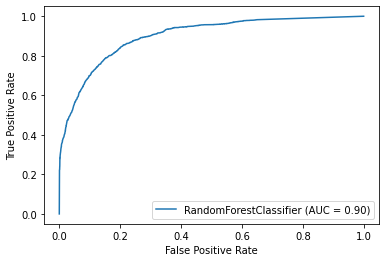

In [32]:
plot_roc_curve(rfc, X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 5001 out of 5001 | elapsed:    7.6s finished


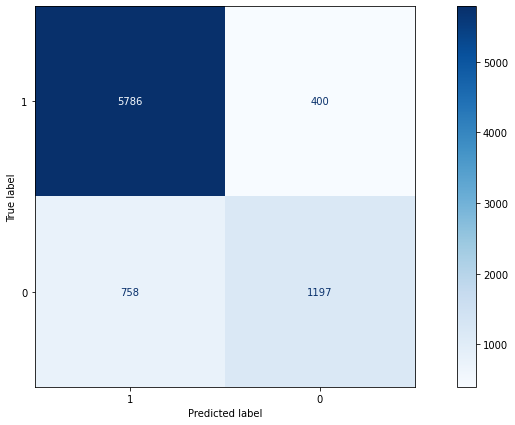

In [33]:
fig, ax = plt.subplots(figsize=(15,7))
plt.grid(False)
plot_confusion_matrix(rfc, X_test, y_test, cmap=plt.cm.Blues, display_labels=['1', '0'], ax=ax)
plt.show()